## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
df_2004 = pd.read_csv('LokSabha2004.csv')
df_2009 = pd.read_csv('LokSabha2009.csv')
df_2014 = pd.read_csv('LokSabha2014.csv')
df_2019 = pd.read_csv('LokSabha2019.csv')

df_2004['Year'] = 2004
df_2009['Year'] = 2009
df_2014['Year'] = 2014
df_2019['Year'] = 2019

df = pd.concat([df_2004, df_2009, df_2014, df_2019])
df = df.drop(columns=['Candidate'], axis = 1)
df.head()

,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
0,INC,0,Post Graduate,65,5926740.0,Andaman & Nicobar Islands,272061,1.0,M,2004
1,BSP,0,Graduate,61,7876500.0,Andaman & Nicobar Islands,65000,0.0,M,2004
2,IND,0,Graduate,50,3070000.0,Andaman & Nicobar Islands,0,0.0,M,2004
3,BJP,0,Graduate,54,1250619.0,Andaman & Nicobar Islands,128710,0.0,M,2004
4,IND,0,Not Given,28,3000.0,Andaman & Nicobar Islands,0,0.0,M,2004


In [3]:
parties = df['Party'].unique()
qualifications = df['Education'].unique()
constituencies = df['Constituency'].unique()

In [4]:
df_new = df[ df['Constituency'] == 'Sangrur' ]
df_new.head()

,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
2365,SAD,0,Graduate,67,13984341.0,Sangrur,0,1.0,M,2004
2366,INC,0,Others,37,65937649.0,Sangrur,5600000,0.0,M,2004
2367,BSP,1,8th Pass,45,6737480.0,Sangrur,0,0.0,M,2004
2368,SAD(A)(Simranjit Singh Mann),1,Graduate,59,33414322.0,Sangrur,0,0.0,M,2004
4921,INC,0,12th Pass,37,34777859.0,Sangrur,374957,1.0,M,2009


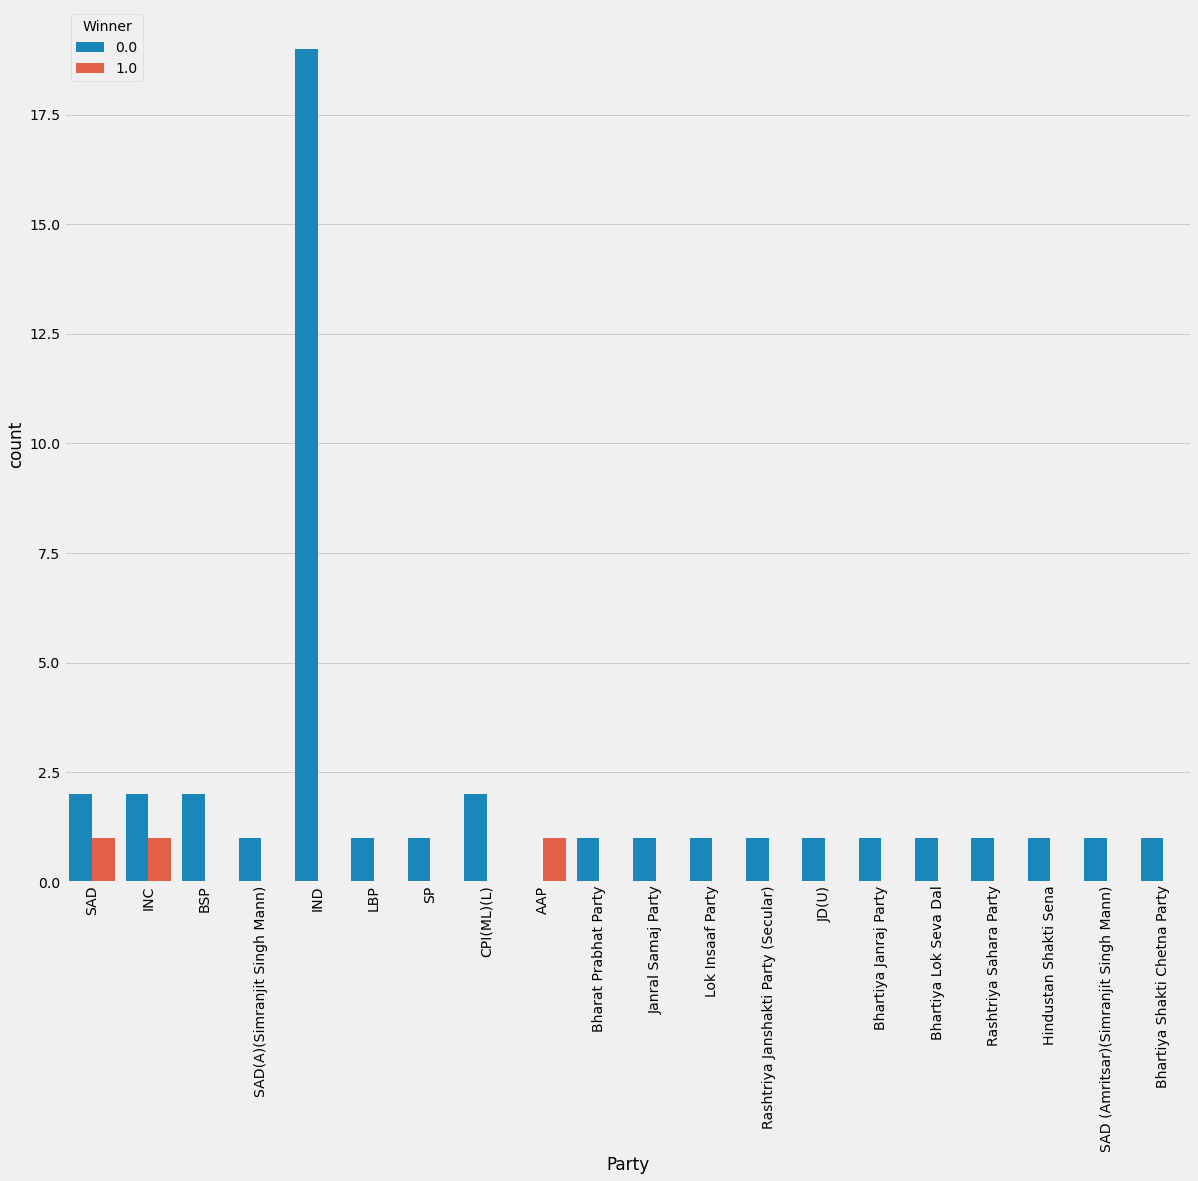

In [5]:
plt.figure(figsize = (18, 15))
sns.countplot(x = 'Party', hue = 'Winner', data = df_new)
plt.xticks(rotation = 90)
plt.show()

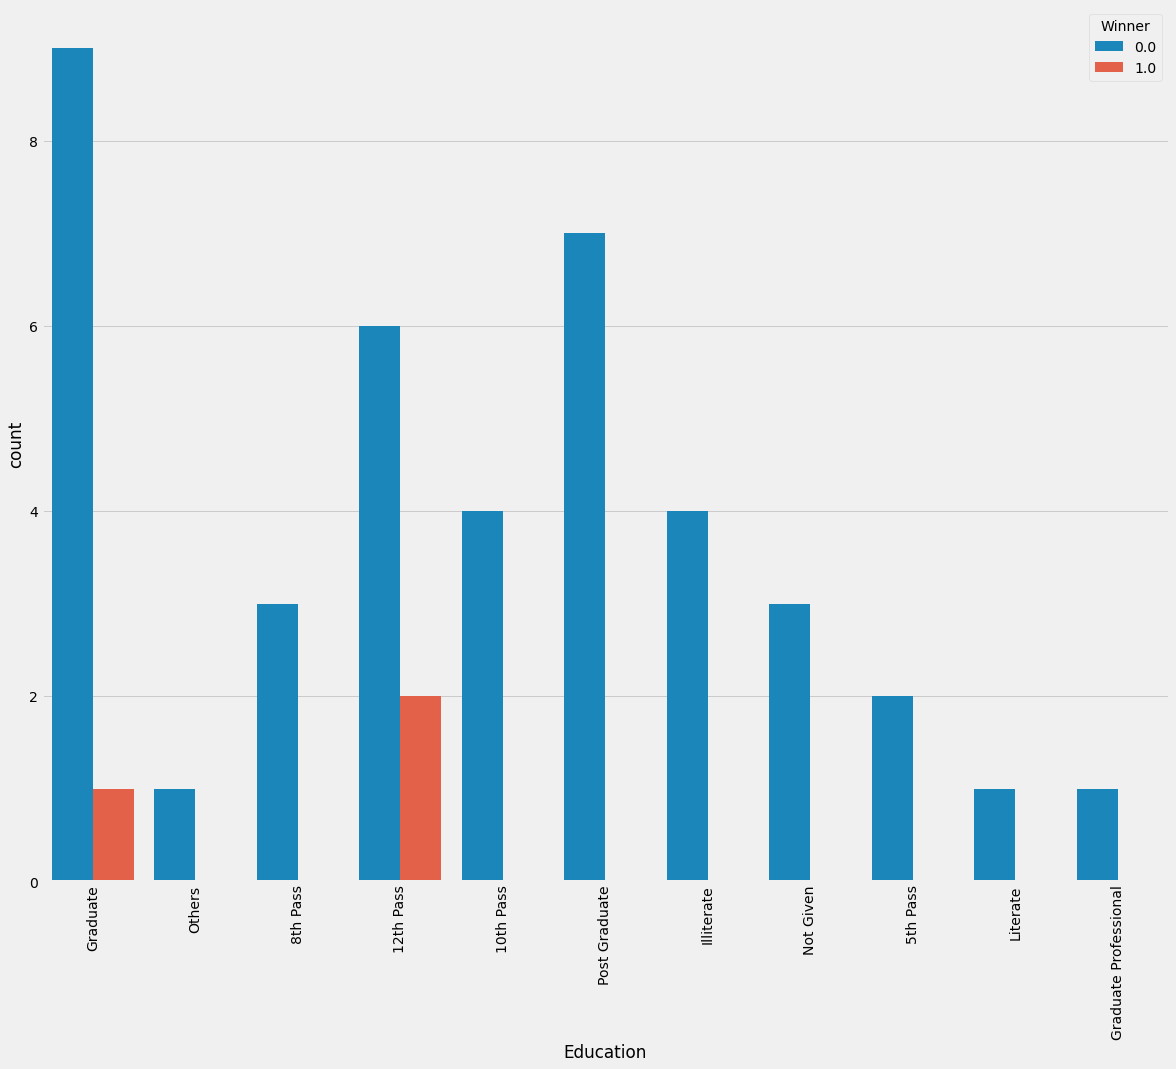

In [7]:
plt.figure(figsize = (18, 15))
sns.countplot(x = 'Education', hue = 'Winner', data = df_new)
plt.xticks(rotation = 90)
plt.show()

In [9]:
df_crime = df_new.groupby('Party').agg({'Criminal Cases':'sum'}).reset_index()

In [10]:
df_crime

,Party,Criminal Cases
0,AAP,0
1,BSP,1
2,Bharat Prabhat Party,0
3,Bhartiya Janraj Party,0
4,Bhartiya Lok Seva Dal,6
5,Bhartiya Shakti Chetna Party,0
6,CPI(ML)(L),0
7,Hindustan Shakti Sena,1
8,INC,0
9,IND,2


(array([ 0.,  5., 10.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

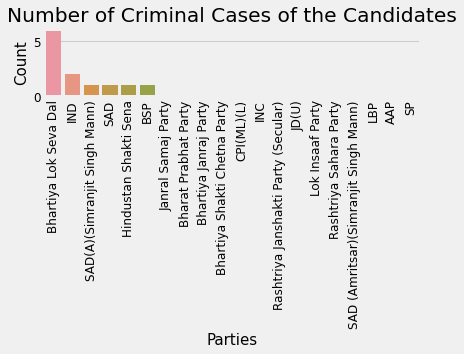

In [12]:
# df_crime = df.groupby('Party').agg({'Criminal Cases':'sum'}).reset_index()
df_crime = df_crime.sort_values(by = ['Criminal Cases'], ascending = False)
plt.subplot(3, 1, 2)
sns.barplot(x = 'Party', y = 'Criminal Cases', data = df_crime)
plt.title('Number of Criminal Cases of the Candidates')
plt.xlabel('Parties', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)